<a href="https://colab.research.google.com/github/KonradSzkliniarz/Bootcamp/blob/master/5_Dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


## skrypt do pobierania danych ze stooq

In [ ]:
def fetch_financial_data(company='AMZN'):
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')
df = fetch_financial_data()
df.info()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2020-09-04 to 2015-09-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-04,3318.00,3381.50,3111.130,3294.62,8781754
2020-09-03,3485.00,3488.41,3303.000,3368.00,8161113
2020-09-02,3547.00,3552.25,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.87,3467.000,3499.12,3476407
2020-08-31,3408.99,3495.00,3405.000,3450.96,4185885
...,...,...,...,...,...
2015-09-14,529.44,532.45,518.580,521.38,3130200
2015-09-11,521.07,529.44,520.600,529.44,3227800
2015-09-10,515.15,526.13,514.780,522.24,2574927


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-04,3318.00,3381.50,3111.130,3294.62,8781754
2020-09-03,3485.00,3488.41,3303.000,3368.00,8161113
2020-09-02,3547.00,3552.25,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.87,3467.000,3499.12,3476407
2020-08-31,3408.99,3495.00,3405.000,3450.96,4185885


In [ ]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-04,3318.00,3381.5000,3111.1300,3294.62,8781754
2020-09-03,3485.00,3488.4100,3303.0000,3368.00,8161113
2020-09-02,3547.00,3552.2500,3486.6850,3531.45,3931476
2020-09-01,3489.58,3513.8700,3467.0000,3499.12,3476407
2020-08-31,3408.99,3495.0000,3405.0000,3450.96,4185885
2020-08-28,3423.00,3433.3699,3386.5000,3401.80,2896978
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842


In [ ]:
df.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2015-09-14,529.44,532.45,518.58,521.38,3130200
2015-09-11,521.07,529.44,520.60,529.44,3227800
2015-09-10,515.15,526.13,514.78,522.24,2574927
2015-09-09,524.00,529.95,515.06,516.89,4370600
2015-09-08,508.69,518.35,508.51,517.54,3810600


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns= [col.lower() for col in df.columns]

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2020-09-04,3318.00,3381.50,3111.130,3294.62,8781754
2020-09-03,3485.00,3488.41,3303.000,3368.00,8161113
2020-09-02,3547.00,3552.25,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.87,3467.000,3499.12,3476407
2020-08-31,3408.99,3495.00,3405.000,3450.96,4185885
...,...,...,...,...,...
2015-09-14,529.44,532.45,518.580,521.38,3130200
2015-09-11,521.07,529.44,520.600,529.44,3227800
2015-09-10,515.15,526.13,514.780,522.24,2574927


In [ ]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1392.133918,1406.449359,1376.088848,1392.239845,4.272874e+06
std,646.831879,655.716205,637.136970,647.006859,2.146744e+06
min,478.010000,493.500000,474.000000,482.070000,8.813370e+05
25%,799.655000,805.909500,795.707500,801.930000,2.821904e+06
50%,1449.140000,1469.000000,1424.890000,1451.050000,3.710448e+06
75%,1820.835000,1832.155000,1803.160000,1819.025000,5.110452e+06
max,3547.000000,3552.250000,3486.685000,3531.450000,1.655260e+07


In [ ]:
df = df.head(10)

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2020-09-04,3318.00,3381.5000,3111.1300,3294.62,8781754
2020-09-03,3485.00,3488.4100,3303.0000,3368.00,8161113
2020-09-02,3547.00,3552.2500,3486.6850,3531.45,3931476
2020-09-01,3489.58,3513.8700,3467.0000,3499.12,3476407
2020-08-31,3408.99,3495.0000,3405.0000,3450.96,4185885
2020-08-28,3423.00,3433.3699,3386.5000,3401.80,2896978
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842


In [ ]:
df['open']

Date
2020-09-04    3318.00
2020-09-03    3485.00
2020-09-02    3547.00
2020-09-01    3489.58
2020-08-31    3408.99
2020-08-28    3423.00
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
Name: open, dtype: float64

In [ ]:
df.open

Date
2020-09-04    3318.00
2020-09-03    3485.00
2020-09-02    3547.00
2020-09-01    3489.58
2020-08-31    3408.99
2020-08-28    3423.00
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
Name: open, dtype: float64

In [ ]:
df.loc[:,'open']

Date
2020-09-04    3318.00
2020-09-03    3485.00
2020-09-02    3547.00
2020-09-01    3489.58
2020-08-31    3408.99
2020-08-28    3423.00
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
Name: open, dtype: float64

In [ ]:
df[['open','close']]

,open,close
Date,,
2020-09-04,3318.00,3294.62
2020-09-03,3485.00,3368.00
2020-09-02,3547.00,3531.45
2020-09-01,3489.58,3499.12
2020-08-31,3408.99,3450.96
2020-08-28,3423.00,3401.80
2020-08-27,3450.05,3400.00
2020-08-26,3351.11,3441.85
2020-08-25,3294.99,3346.49


In [ ]:
df.iloc[:,[0,3]]

,open,close
Date,,
2020-09-04,3318.00,3294.62
2020-09-03,3485.00,3368.00
2020-09-02,3547.00,3531.45
2020-09-01,3489.58,3499.12
2020-08-31,3408.99,3450.96
2020-08-28,3423.00,3401.80
2020-08-27,3450.05,3400.00
2020-08-26,3351.11,3441.85
2020-08-25,3294.99,3346.49


In [ ]:
df.iloc[:,0:3]

,open,high,low
Date,,,
2020-09-04,3318.00,3381.5000,3111.1300
2020-09-03,3485.00,3488.4100,3303.0000
2020-09-02,3547.00,3552.2500,3486.6850
2020-09-01,3489.58,3513.8700,3467.0000
2020-08-31,3408.99,3495.0000,3405.0000
2020-08-28,3423.00,3433.3699,3386.5000
2020-08-27,3450.05,3453.0000,3378.0000
2020-08-26,3351.11,3451.7387,3344.5675
2020-08-25,3294.99,3357.4000,3267.0000


In [ ]:
df.iloc[:,[-1]]

,volume
Date,
2020-09-04,8781754
2020-09-03,8161113
2020-09-02,3931476
2020-09-01,3476407
2020-08-31,4185885
2020-08-28,2896978
2020-08-27,4264795
2020-08-26,6508743
2020-08-25,3992842


In [ ]:
df.iloc[:,-3:]

,low,close,volume
Date,,,
2020-09-04,3111.1300,3294.62,8781754
2020-09-03,3303.0000,3368.00,8161113
2020-09-02,3486.6850,3531.45,3931476
2020-09-01,3467.0000,3499.12,3476407
2020-08-31,3405.0000,3450.96,4185885
2020-08-28,3386.5000,3401.80,2896978
2020-08-27,3378.0000,3400.00,4264795
2020-08-26,3344.5675,3441.85,6508743
2020-08-25,3267.0000,3346.49,3992842


## selekcja wierszy

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2020-09-04,3318.00,3381.5000,3111.1300,3294.62,8781754
2020-09-03,3485.00,3488.4100,3303.0000,3368.00,8161113
2020-09-02,3547.00,3552.2500,3486.6850,3531.45,3931476
2020-09-01,3489.58,3513.8700,3467.0000,3499.12,3476407
2020-08-31,3408.99,3495.0000,3405.0000,3450.96,4185885
2020-08-28,3423.00,3433.3699,3386.5000,3401.80,2896978
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842


In [ ]:
df.iloc[5]

open      3.423000e+03
high      3.433370e+03
low       3.386500e+03
close     3.401800e+03
volume    2.896978e+06
Name: 2020-08-28 00:00:00, dtype: float64

In [ ]:
df.iloc[[5]].T

Date,2020-08-28
open,3.423000e+03
high,3.433370e+03
low,3.386500e+03
close,3.401800e+03
volume,2.896978e+06


In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2020-09-04,3318.0,3381.50,3111.130,3294.62,8781754
2020-09-03,3485.0,3488.41,3303.000,3368.00,8161113
2020-09-02,3547.0,3552.25,3486.685,3531.45,3931476


In [ ]:
df.loc['2020-09-04']

,open,high,low,close,volume
Date,,,,,
2020-09-04,3318.0,3381.5,3111.13,3294.62,8781754


In [ ]:
df.loc['2020-09-06':'2020-09-01']

,open,high,low,close,volume
Date,,,,,
2020-09-04,3318.00,3381.50,3111.130,3294.62,8781754
2020-09-03,3485.00,3488.41,3303.000,3368.00,8161113
2020-09-02,3547.00,3552.25,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.87,3467.000,3499.12,3476407


In [ ]:
df = fetch_financial_data('MSFT')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2020-09-04 to 2015-09-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df = fetch_financial_data('UBER')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2020-09-04 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    335 non-null    float64
 1   High    335 non-null    float64
 2   Low     335 non-null    float64
 3   Close   335 non-null    float64
 4   Volume  335 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.7 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-04,33.33,33.650,31.5500,33.24,17480617
2020-09-03,34.08,34.740,32.9500,33.41,17288823
2020-09-02,34.21,34.505,33.2900,34.37,16552685
2020-09-01,33.45,34.510,33.1450,34.30,16026170
2020-08-31,33.62,33.920,33.1401,33.63,14980621


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,335.000000,335.000000,335.000000,335.000000,3.350000e+02
mean,33.770115,34.447404,32.958678,33.730358,2.491034e+07
std,5.691501,5.626391,5.707037,5.630904,2.022593e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.030000,30.450000,29.400000,30.080000,1.041388e+07
50%,32.750000,33.355000,31.983000,32.790000,2.076217e+07
75%,37.220000,37.732500,36.265000,37.005000,3.269494e+07
max,46.980000,47.080000,45.080000,46.380000,1.863225e+08


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-04,33.33,33.650,31.5500,33.24,17480617
2020-09-03,34.08,34.740,32.9500,33.41,17288823
2020-09-02,34.21,34.505,33.2900,34.37,16552685
2020-09-01,33.45,34.510,33.1450,34.30,16026170
2020-08-31,33.62,33.920,33.1401,33.63,14980621


In [ ]:
df['Avg']=(df.Open+df.Close)/2

In [ ]:
df

,Open,High,Low,Close,Volume,Avg
Date,,,,,,
2020-09-04,33.33,33.650,31.5500,33.24,17480617,33.285
2020-09-03,34.08,34.740,32.9500,33.41,17288823,33.745
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625
...,...,...,...,...,...,...
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135


In [ ]:
df.sort_index(inplace=True)

In [ ]:
df

,Open,High,Low,Close,Volume,Avg
Date,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240
...,...,...,...,...,...,...
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290


## Metoda shift przesuwa dane o 1 względem indeksu

In [ ]:
df[['Close']].shift(1)

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2020-08-31,33.80
2020-09-01,33.63
2020-09-02,34.30


In [ ]:
df['Close_shift']=df[['Close']].shift(1)

In [ ]:
df

,Open,High,Low,Close,Volume,Avg,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29
...,...,...,...,...,...,...,...
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,33.80
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,33.63
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290,34.30


In [ ]:
df['Change_%']=df.Close/df.Close_shift - 1

In [ ]:
df

,Open,High,Low,Close,Volume,Avg,Close_shift,Change_%
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,33.80,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,33.63,0.019923
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290,34.30,0.002041


In [ ]:
df.drop('Close_shift', axis=1)

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...,...
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,0.019923
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290,0.002041


In [ ]:
df

,Open,High,Low,Close,Volume,Avg,Close_shift,Change_%
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,33.80,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,33.63,0.019923
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290,34.30,0.002041


In [ ]:
del df['Close_shift']

In [ ]:
df

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...,...
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,0.019923
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290,0.002041


In [ ]:
df['Change_%'].min()

-0.21628767847699626

In [ ]:
df['Change_%'].max()

0.3825910931174088

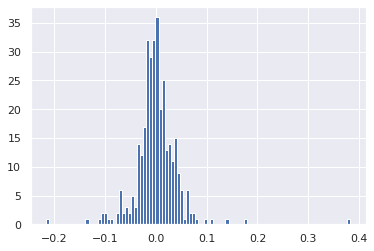

In [ ]:
import seaborn as sns

sns.set()

df['Change_%'].hist(bins=100)

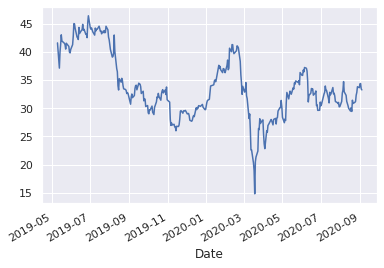

In [ ]:
df.Close.plot()

## Filtrowanie danych

In [ ]:
df

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...,...
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,0.019923
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290,0.002041


In [ ]:
# tworzymy 'maskę' filtra i ją używamy

df_positive=df[df['Change_%'] > 0]
df_positive

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,0.041414
2019-05-24,41.28,41.510,40.500,41.51,8786751,41.395,0.025698
2019-05-31,41.15,41.570,39.410,40.41,23209848,40.780,0.015327
...,...,...,...,...,...,...,...
2020-08-26,31.01,32.710,30.950,32.30,20599776,31.655,0.035588
2020-08-27,32.40,33.070,32.270,32.80,21306491,32.600,0.015480
2020-08-28,33.00,33.940,32.820,33.80,17833021,33.400,0.030488


In [ ]:
df_negative=df[df['Change_%'] < 0]
df_negative

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,-0.107529
2019-05-17,41.98,43.290,41.2700,41.91,20225687,41.945,-0.025349
2019-05-20,41.19,41.680,39.4600,41.59,29222330,41.390,-0.007635
2019-05-21,42.00,42.240,41.2500,41.50,10802851,41.750,-0.002164
2019-05-22,41.05,41.280,40.5000,41.25,9089469,41.150,-0.006024
...,...,...,...,...,...,...,...
2020-08-19,30.15,30.349,29.3900,29.42,14050333,29.785,-0.021941
2020-08-21,31.39,31.820,30.7144,30.83,20216997,31.110,-0.018465
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,-0.005030


In [ ]:
df_positive['Change_%'].mean()

0.028588790658181228

In [ ]:
df_negative['Change_%'].mean()

-0.025674524220588538

In [ ]:
df.Close==df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2020-08-31    False
2020-09-01    False
2020-09-02    False
2020-09-03    False
2020-09-04    False
Length: 335, dtype: bool

In [ ]:
df[df.Close==df.High]

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,0.004832


In [ ]:
df[df.Close==df.Low]

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,-0.016303


In [ ]:
df.index > '2019-01-01'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
df[df.index > '2019-01-01']

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...,...
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,0.019923
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290,0.002041


In [ ]:
## używamy operatora & 

df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,0.000375


In [ ]:
## jeśli chcemy użyć 'LUB' to używamy tej oto kreski ---> |

In [ ]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-14')]

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,-0.004127
2019-11-14,26.80,26.86,25.6650,25.99,28027875,26.395,-0.026956


In [ ]:
df

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...,...
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,0.019923
2020-09-02,34.21,34.505,33.2900,34.37,16552685,34.290,0.002041


In [ ]:
## wycinamy dane dla całego miesiąca

df.index.month == 5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df[(df.index.month == 5) & (df.index.year == 2020)]

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2020-05-01,29.13,29.7200,28.325,28.39,19290192,28.760,-0.062108
2020-05-04,27.56,28.0700,26.580,27.42,23428333,27.490,-0.034167
2020-05-05,28.25,28.9088,27.440,28.07,30725371,28.160,0.023705
2020-05-06,27.50,28.0600,26.810,27.82,31076451,27.660,-0.008906
2020-05-07,29.60,31.6500,29.580,30.93,62229496,30.265,0.111790
2020-05-08,32.59,33.3000,31.640,32.79,69525793,32.690,0.060136
2020-05-11,31.98,32.3850,31.410,31.64,26439191,31.810,-0.035072
2020-05-12,31.42,34.4500,30.410,32.40,89585967,31.910,0.024020
2020-05-13,32.30,33.0600,30.830,33.02,47279487,32.660,0.019136


In [ ]:
df[(df.index.day==1)]

,Open,High,Low,Close,Volume,Avg,Change_%
Date,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,-0.004127
2020-04-01,26.50,26.7670,24.8101,25.42,38538381,25.960,-0.089542
2020-05-01,29.13,29.7200,28.3250,28.39,19290192,28.760,-0.062108
2020-06-01,35.64,36.3900,35.1600,35.82,21893806,35.730,-0.013767
2020-07-01,30.96,31.2650,30.1622,30.43,13611544,30.695,-0.020914
2020-09-01,33.45,34.5100,33.1450,34.30,16026170,33.875,0.019923
